Il modello di Ising è un famoso sistema ampiamente studiato in meccanica statistica. In questa esercitazione andrò a studiarne la versione monodimensionale con periodic boundary conditions. Lo scopo dell'esercitazione sarà quello di verificare che attraverso la simulazione di questo modello di Ising nell'insieme canonico, mediante l'utilizzo dell'algoritmo di Metropolis o dell'algoritmo per il sampling di Gibbs, si è in grado di ricostruire la termodinamica. Il modello di Ising monodimensionale è studiabile e risolvibile analiticamente, per cui avrò a disposizione, come confronto, le grandezze termodinamiche esatte.

## Esercizio 06.1

Equilibrazione: dopo aver implementato l'algoritmo di Metropolis, ho cercato di osservare il processo di equilibrazione del sistema nel caso più estremo che andrò ad analizzare, ovvero il passaggio allo stato di equilibrio alla temperatura di 0.5 (la più bassa), partendo dallo stato iniziale in cui gli spin sono orientati indipendentemente l'uno dall'altro. Ho misurato l'energia usando blocchi da dieci step ciascuno (ben conscio del fatto che le stime saranno inaccurate e ci sarà molta correlazione tra un blocco e il successivo) solo per riuscire ad osservare l'equilibrazione del sistema, che a quanto pare risulta essere molto rapida. In effetti, come mostrato dal grafico sottostante, l'equilibrazione avviene entro i primi dieci blocchi, ovvero i primi 100 step. A questo punto ho modo di stabilire quanto far durare l'equilibrazione del sistema nelle simulazioni successive.

"plt.plot(gen,meanl, label = 'mean')\nplt.plot(gen,bestl, label = 'best')\nplt.legend()"

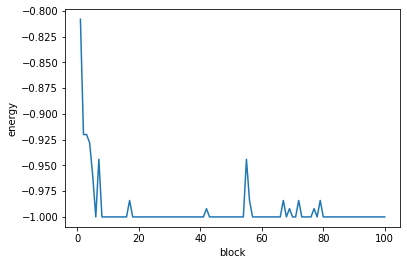

In [3]:
import matplotlib.pyplot as plt
import numpy as np

'''for i in range(15):
    filename = "ISING_1Ddef/output" + str(np.int(5+i)) + ".ene.0"
    #print(filename)'''
filename = "ISING_1Ddef/output_test.ene.0"

blk = np.loadtxt(filename, usecols = 0)
en = np.loadtxt(filename, usecols = 1)
en_err = np.loadtxt(filename, usecols = 3)

plt.plot(blk, en)
plt.xlabel("block")
plt.ylabel("energy")
    
'''plt.plot(gen,meanl, label = 'mean')
plt.plot(gen,bestl, label = 'best')
plt.legend()'''

A basse temperature (0.5), ho notato che il rate di accettazione è molto basso, tipicamente inferiore all'1%

## Metropolis

Di seguito presento i risultati della simulazione effettuata con l'algoritmo di Metropolis.
Vediamo l'energia interna:

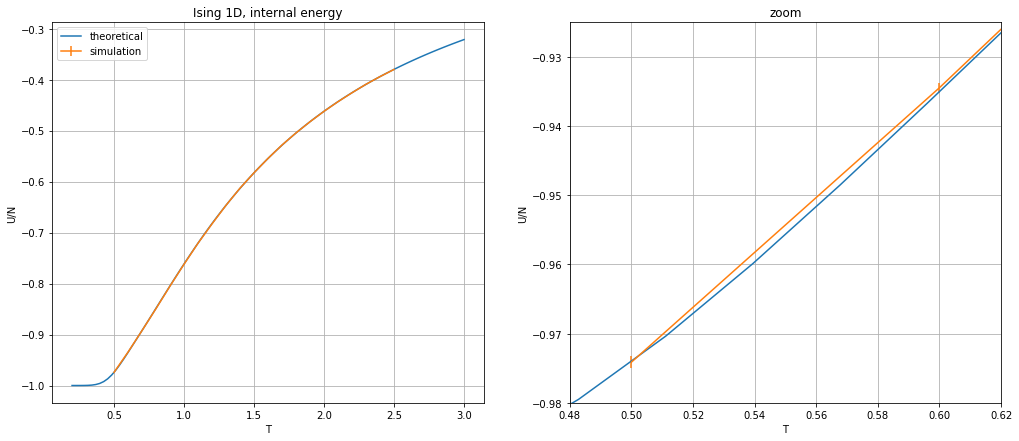

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

temp_sim = []
e_sim = []
e_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/M/output" + str(np.int(5+i)) + ".ene.0"
    temp_sim.append((5.+i)/10.)
    en = np.loadtxt(filename, usecols = 2)
    en_err = np.loadtxt(filename, usecols = 3)  
    e_sim.append(en[last-1])
    e_err_sim.append(en_err[last-1])
    #print(filename)   

    
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, e, label='theoretical')
plt.errorbar(temp_sim, e_sim, yerr = e_err_sim, label='simulation')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, e, label='theoretical')
plt.errorbar(temp_sim, e_sim, yerr = e_err_sim)
plt.xlim((0.48,0.62))
plt.ylim((-0.98, -0.925))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.show()

Si può notare come l'andamento segua quello della curva teorica. Nella figura a desta c'è uno zoom per poter vedere le barre d'errore, non visibili nel primo grafico. I risultati ottenuti sono in accordo con le attese teoriche. Di seguito mostro i risultati ottenuti per la capacità termica:

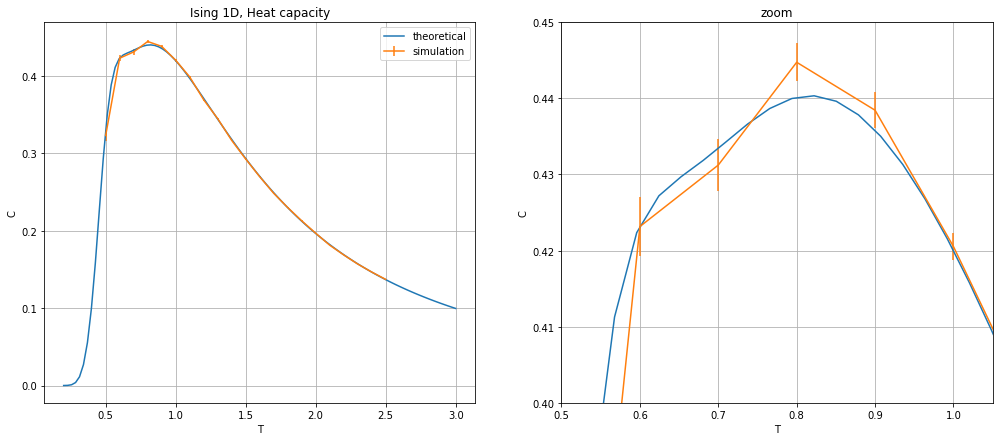

In [22]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

temp_sim = []
heat_sim = []
heat_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/M/output" + str(np.int(5+i)) + ".heat.0"
    temp_sim.append((5.+i)/10.)
    he = np.loadtxt(filename, usecols = 2)
    he_err = np.loadtxt(filename, usecols = 3)  
    heat_sim.append(he[last-1])
    heat_err_sim.append(he_err[last-1])
    #print(filename)   

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, heat, label='theoretical')
plt.errorbar(temp_sim, heat_sim, yerr = heat_err_sim, label='simulation')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, heat, label='theoretical')
plt.errorbar(temp_sim, heat_sim, yerr = heat_err_sim)
plt.xlim((0.5,1.05))
plt.ylim((0.4, 0.45))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.show()

Anche in questo caso i risultati sono in accordo con le attese. Di seguito esamino i risultati ottenuti per la magnetizzazione.

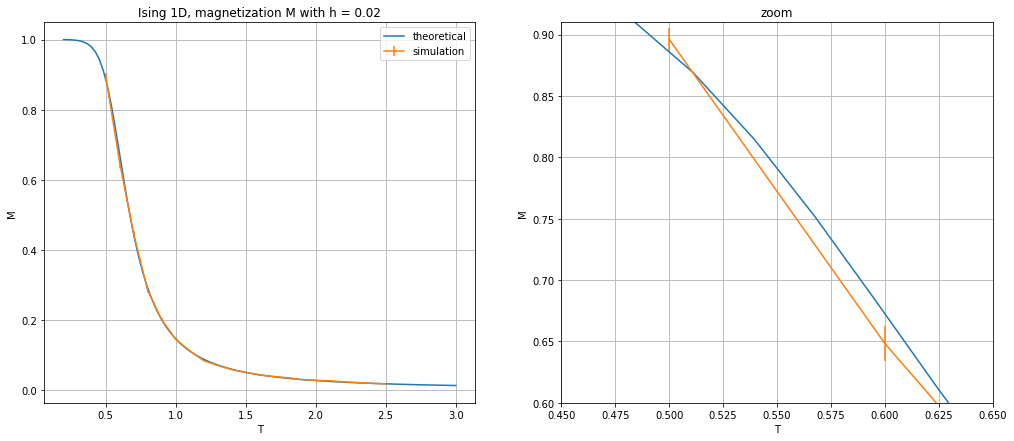

In [26]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

temp_sim = []
m_sim = []
m_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/Mh/output" + str(np.int(5+i)) + "h.mag.0"
    temp_sim.append((5.+i)/10.)
    m = np.loadtxt(filename, usecols = 2)
    m_err = np.loadtxt(filename, usecols = 3)  
    m_sim.append(m[last-1])
    m_err_sim.append(m_err[last-1])
    #print(filename)   

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, M, label='theoretical')
plt.errorbar(temp_sim, m_sim, yerr = m_err_sim, label='simulation')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, M, label='theoretical')
plt.errorbar(temp_sim, m_sim, yerr = m_err_sim)
plt.xlim((0.45,0.65))
plt.ylim((0.6, 0.91))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(True)
plt.show()

Anche qui c'è un ottimo accordo con le attese. Vediamo la suscettivita:

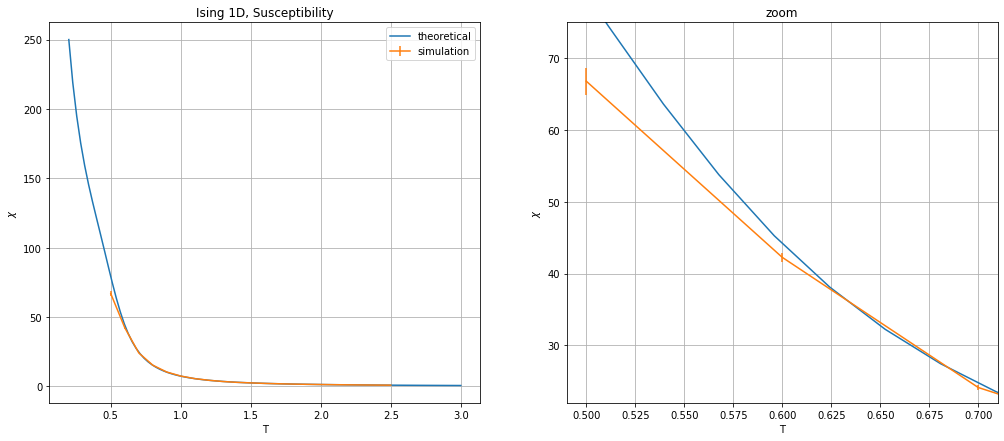

In [31]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

temp_sim = []
c_sim = []
c_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/M/output" + str(np.int(5+i)) + ".chi.0"
    temp_sim.append((5.+i)/10.)
    c = np.loadtxt(filename, usecols = 2)
    c_err = np.loadtxt(filename, usecols = 3)  
    c_sim.append(c[last-1])
    c_err_sim.append(c_err[last-1])
    #print(filename)   
    
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, X, label='theoretical')
plt.errorbar(temp_sim, c_sim, yerr = c_err_sim, label='simulation')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, X, label='theoretical')
plt.errorbar(temp_sim, c_sim, yerr = c_err_sim)
plt.xlim((0.49,0.71))
plt.ylim((22, 75))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.show()

In questo caso noto una discrepanza nel confronto con i dati attesi per il dato preso a temperatura più bassa, mentre ad alte temperature l'accordo è ottimo.

## Gibbs sampling

Ho ripetuto la stessa analisi dopo aver implementato il sampling alla Gibbs.

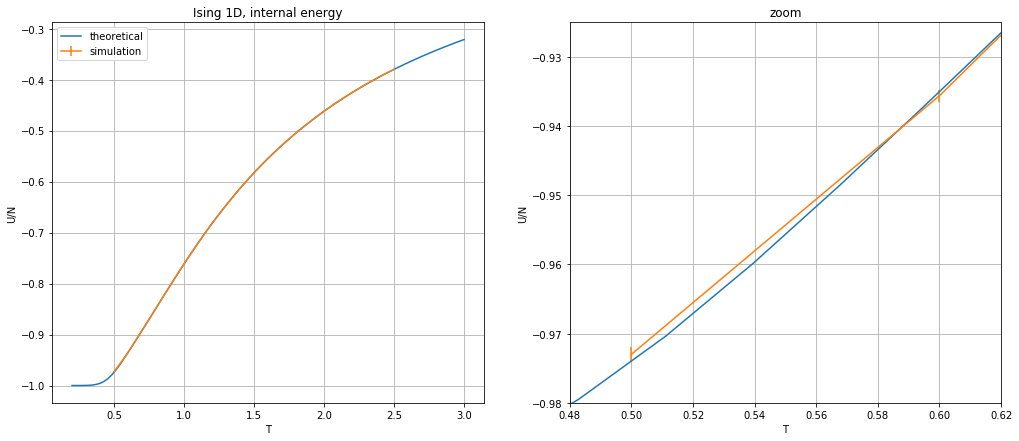

In [32]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

temp_sim = []
e_sim = []
e_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/G/output" + str(np.int(5+i)) + ".ene.0"
    temp_sim.append((5.+i)/10.)
    en = np.loadtxt(filename, usecols = 2)
    en_err = np.loadtxt(filename, usecols = 3)  
    e_sim.append(en[last-1])
    e_err_sim.append(en_err[last-1])
    #print(filename)   
    
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, e, label='theoretical')
plt.errorbar(temp_sim, e_sim, yerr = e_err_sim, label='simulation')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, e, label='theoretical')
plt.errorbar(temp_sim, e_sim, yerr = e_err_sim)
plt.xlim((0.48,0.62))
plt.ylim((-0.98, -0.925))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.show()

Per quanto riguarda l'energia interna registro un ottimo accordo con le attese, come prima.

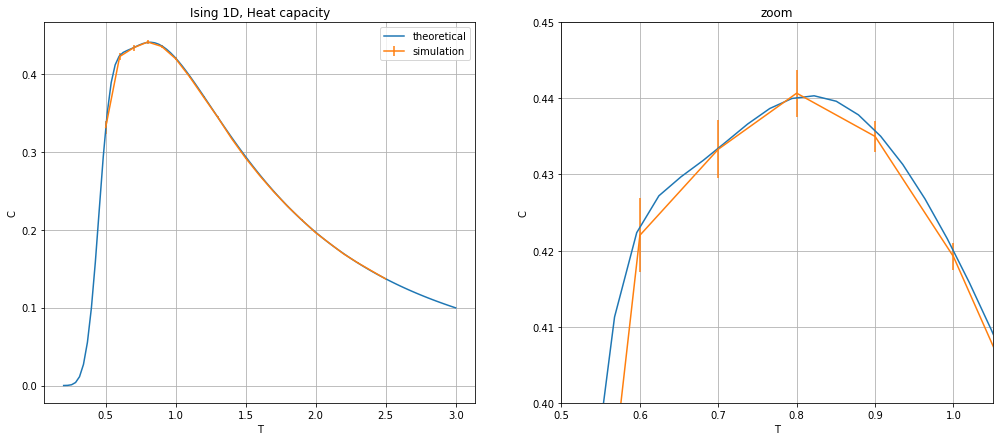

In [33]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

temp_sim = []
heat_sim = []
heat_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/G/output" + str(np.int(5+i)) + ".heat.0"
    temp_sim.append((5.+i)/10.)
    he = np.loadtxt(filename, usecols = 2)
    he_err = np.loadtxt(filename, usecols = 3)  
    heat_sim.append(he[last-1])
    heat_err_sim.append(he_err[last-1])
    #print(filename)   

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, heat, label='theoretical')
plt.errorbar(temp_sim, heat_sim, yerr = heat_err_sim, label='simulation')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, heat, label='theoretical')
plt.errorbar(temp_sim, heat_sim, yerr = heat_err_sim)
plt.xlim((0.5,1.05))
plt.ylim((0.4, 0.45))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.show()

Anche la capacità termica è in accordo con le attese.

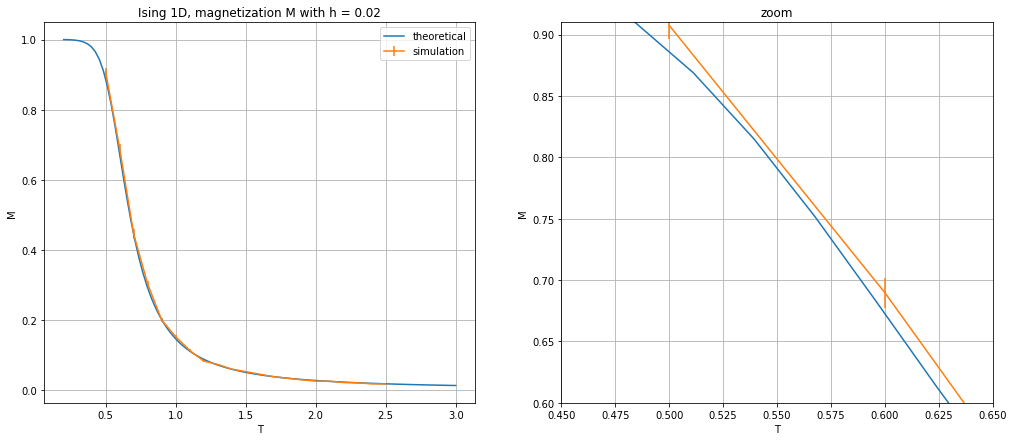

In [34]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

temp_sim = []
m_sim = []
m_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/Gh/output" + str(np.int(5+i)) + "h.mag.0"
    temp_sim.append((5.+i)/10.)
    m = np.loadtxt(filename, usecols = 2)
    m_err = np.loadtxt(filename, usecols = 3)  
    m_sim.append(m[last-1])
    m_err_sim.append(m_err[last-1])
    #print(filename)   
    
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, M, label='theoretical')
plt.errorbar(temp_sim, m_sim, yerr = m_err_sim, label='simulation')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, M, label='theoretical')
plt.errorbar(temp_sim, m_sim, yerr = m_err_sim)
plt.xlim((0.45,0.65))
plt.ylim((0.6, 0.91))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(True)
plt.show()

La magnetizzazione con campo magnetico non nullo pari ad $h=0.02$, segue l'andamento teorico.

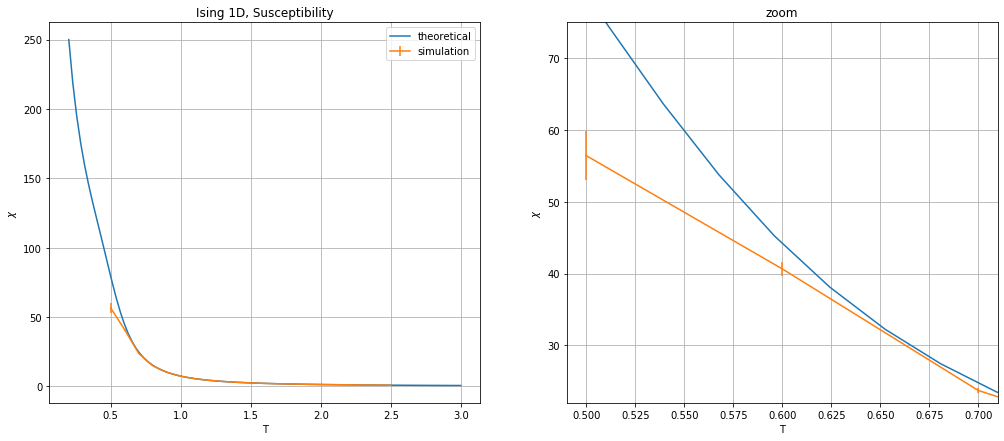

In [35]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

temp_sim = []
c_sim = []
c_err_sim = []
last = 80;

for i in range(21):
    filename = "ISING_1Ddef/G/output" + str(np.int(5+i)) + ".chi.0"
    temp_sim.append((5.+i)/10.)
    c = np.loadtxt(filename, usecols = 2)
    c_err = np.loadtxt(filename, usecols = 3)  
    c_sim.append(c[last-1])
    c_err_sim.append(c_err[last-1])
    #print(filename)   
    
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)
    
plt.subplot(1,2,1)
plt.plot(T, X, label='theoretical')
plt.errorbar(temp_sim, c_sim, yerr = c_err_sim, label='simulation')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(T, X, label='theoretical')
plt.errorbar(temp_sim, c_sim, yerr = c_err_sim)
plt.xlim((0.49,0.71))
plt.ylim((22, 75))
plt.title('zoom')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.show()

Anche in quest'ultimo caso, così come per il caso del Metropolis, noto una discrepanza tra le attese e i risultati simulati a basse temperature.